In [ ]:
from keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.mobilenet import decode_predictions, preprocess_input
%matplotlib inline

In [ ]:
# load the trained model from disk
print("[INFO] loading model...")
model = load_model('model-wastify.h5')

[INFO] loading model...


1/1 [==============================] - 0s 61ms/step


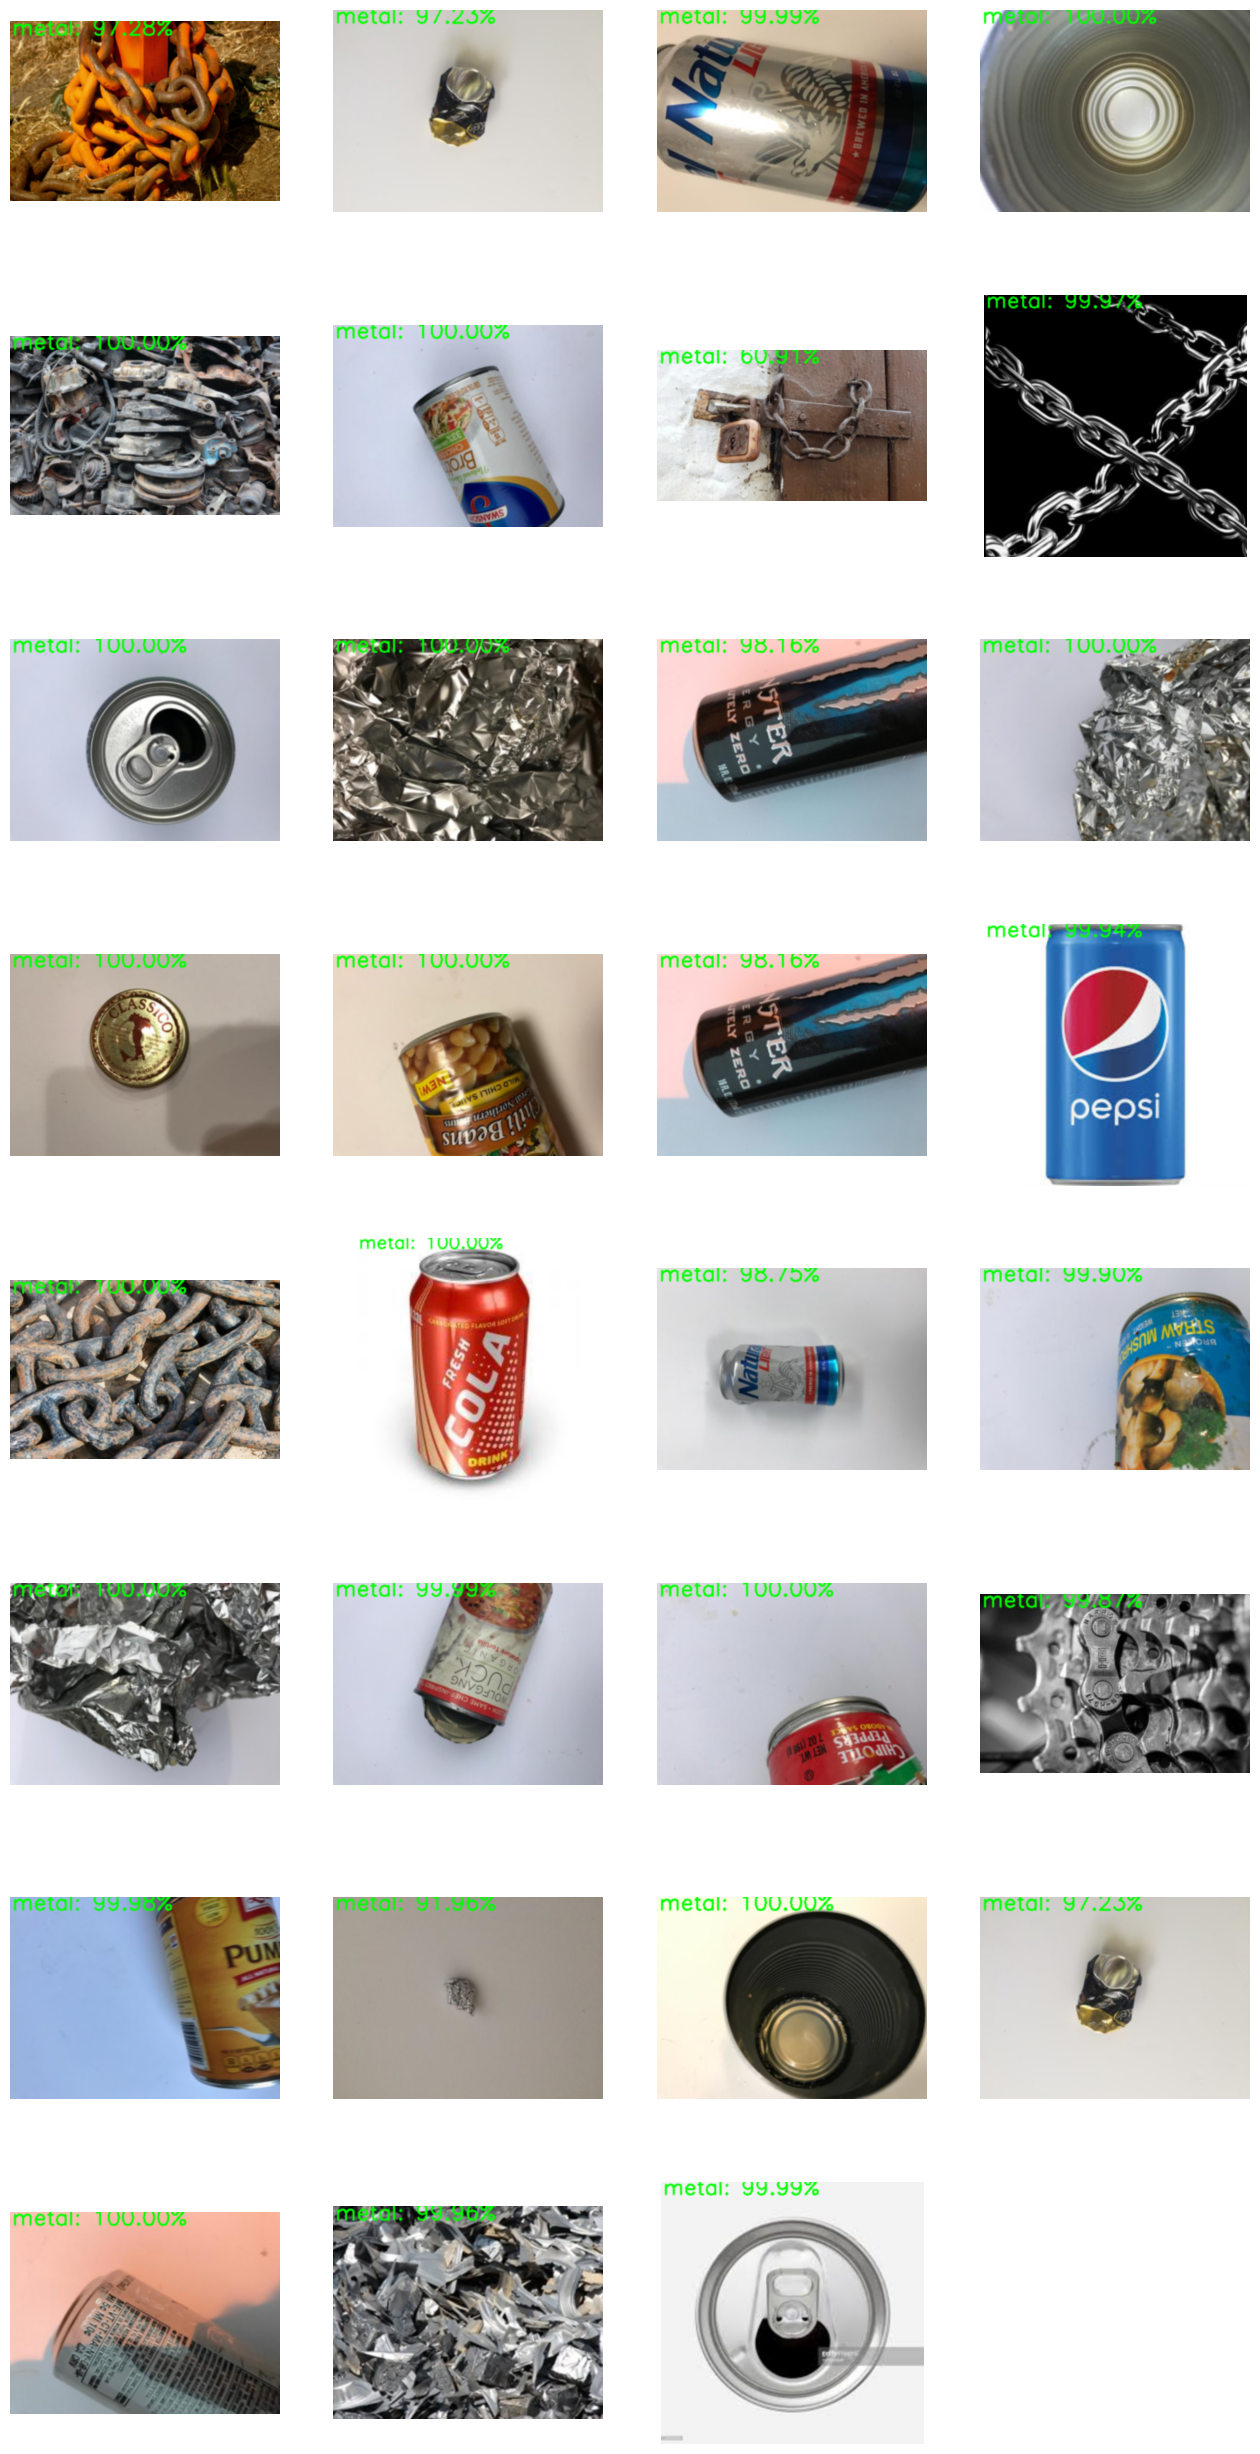

In [ ]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 8
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# pic_index += 8

# load the input image and then clone it so we can draw on it later
waste_types = ['cardboard','glass','metal','organic','paper','plastic']
test_d = 'data/test/' + waste_types[2] + '/'
# test_d = '/content/cropped_resized_image.jpg'
test_files = os.listdir(test_d)[33:64]
for i, fn in enumerate(test_files):

    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, facecolor='red')
    sp.axis('Off') # Don't show axes (or gridlines)
    # predicting images
    path = test_d + fn
    image = cv2.imread(path)

    img = load_img(path, target_size=TARGET_SIZE)

    output = image.copy()
    output = imutils.resize(output, width=400)

    img = img_to_array(img)

    # our model was trained on RGB ordered images but OpenCV represents
    # images in BGR order, so swap the channels, and then resize to
    # 224x224 (the input dimensions for VGG16)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, TARGET_SIZE)
    # print(image.shape)

    # convert the image to a floating point data type and perform mean
    # subtraction
    image = image.astype("float32") / 255.
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # pass the image through the network to obtain our predictions
    # preds = model.predict(np.expand_dims(image / 255., axis=0))[0]
    preds = model.predict(img)[0]
    i = np.argmax(preds)
    label = waste_types[i]
    # print(label)

    # draw the prediction on the output image
    text = "{}: {:.2f}%".format(label, preds[i] * 100)
    cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 1.05,
        (0, 255, 0), 2)

    # show the output image
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB), interpolation = 'bicubic')
    # cv2.imshow("Output", output)
    cv2.waitKey(0)
plt.show()

1/1 [==============================] - 0s 256ms/step
plastic
[2.5470490e-02 8.2625402e-04 3.6824858e-01 1.4673845e-03 5.8673666e-04
 6.0340059e-01]


-1

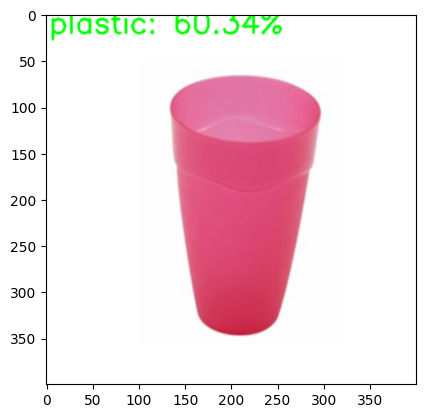

In [ ]:
path = 'data/coba/gls.jpg'
image = cv2.imread(path)

img = load_img(path, target_size=TARGET_SIZE)

output = image.copy()
output = imutils.resize(output, width=400)

img = img_to_array(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, TARGET_SIZE)
# print(image.shape)

    # subtraction
image = image.astype("float32") / 255.
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

    # pass the image through the network to obtain our predictions
    # preds = model.predict(np.expand_dims(image / 255., axis=0))[0]
preds = model.predict(img)[0]
i = np.argmax(preds)
label = waste_types[i]
print(label)
print(preds)

    # draw the prediction on the output image
text = "{}: {:.2f}%".format(label, preds[i] * 100)
cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 1.05,
    (0, 255, 0), 2)

    # show the output image
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB), interpolation = 'bicubic')
    # cv2.imshow("Output", output)
cv2.waitKey(0)
